# 課題8：住宅価格のデータ解析

課題6では、アイオワ州の住宅価格予測を行ないました。その際に利用したデータは、モデリングの基礎を学びやすくするために、変数の抜粋やデータの調整を施していました。

では、調整されていない「実際のデータ」を使って解析するには、どうしたらよいでしょうか？アイオワ州の住宅価格のデータは有名であるため、さまざまな人がブログなどで、その方法を公開しています。

例: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

本課題では、*iowa_housing_price.csv* のデータを使って作業に取り組んでもらいます。課題を通じて「実際のデータを使って解析する際にどのような作業を行なうか」について学び、今までの知識をブラッシュアップしていきましょう。

CSVの各列がどういう情報かについては、以下のページの Data fields を参照してください。

https://www.openintro.org/data/index.php?data=ames

**注意点：**

- 列名にドット（`.`）が入っているとPandasの処理中にエラーが発生するため、元データの列名から `.` を削除しています
- PID列のみ、元データから削除しています

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

sns.set()

## 2. データの読み込み

In [2]:
# CSVファイルからデータを読み込んで変数 data に格納
# （列数が非常に多いため、head()などは使わずファイル一覧からCSVを開いて確認してください）
data = pd.read_csv('./iowa_ames_housing_price.csv')

## 3. データの概要を確認

データの正規性をQ-Qプロットで確認します。正規性が小さいと、検定の種類によっては結果を正しく解析することができないからです。

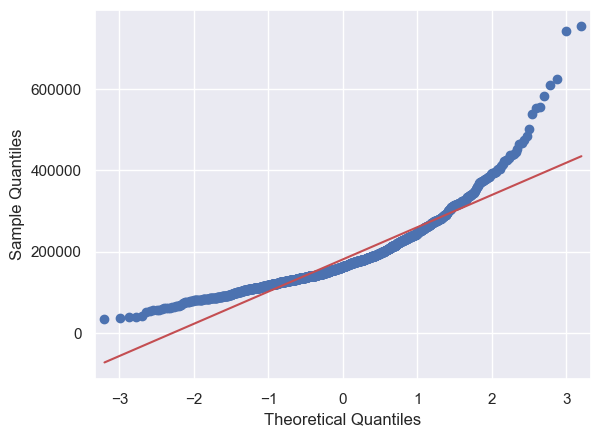

In [5]:
# priceについてQ-Qプロットを確認
fig = sm.qqplot(data['price'], line='s')

直線にあまり乗っていません。このような場合は、何らかの **データ変換** を行い、正規性が確保できる状態にします。今回は **Log Transformation（対数変換）** を実施しましょう。

In [6]:
# NumPy の log1p を用いて、すべてのデータのprice列を対数変換
data['price'] = np.log1p(data['price'])

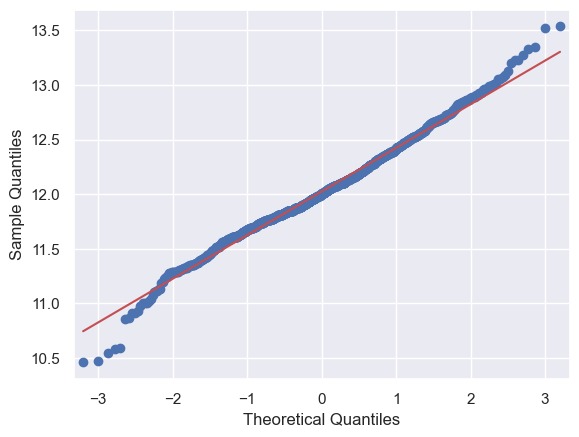

In [7]:
# 再度priceについてQ-Qプロットを確認
fig_log = sm.qqplot(data['price'], line='s')

## 4. 欠損値の確認と補充

データが欠損値を含む場合、そのまま回帰分析等を行うとエラーが発生したり、精度が悪くなる可能性があります。

欠損値があまり多くない場合には、シンプルに欠損値を含むデータを削除すればよいです。
しかし、欠損値が多い場合には削除してしまうとデータの多くを失ってしまうことになります。
そのような場合には、**当たり障りのない値で埋める** という手法が取られます。

まずは欠損値を含む列について、その数を出力してみましょう。

In [32]:
# 欠損値の数を調べる
# （1つ以上の欠損値がある列の情報のみ表示すること）
for column in data.columns:
    if any(data[column].isnull() > 0):
        print(column)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


次に、欠損値の補充を行います。本来ならすべての列について欠損値を埋めるべきですが、今回の課題では2つの列についてのみ対応します。

### 4-1. PoolQCの場合

PoolQCは「プールの品質」に関する情報です。プールがない家は NaN（csv上では NA ）が入っています。そのため、「無いことを意味しているが欠損値として扱われないデータ」、たとえば "None" という文字列で置き換えましょう。

In [34]:
data['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [ ]:
# PoolQCの欠損値を文字列 "None" で置換する

TypeError: 'method' object is not subscriptable

### 4-2. LotFrontageの場合

LotFrontageは「間口の広さ（家屋の正面の幅）」に関する情報です。LotFrontageが欠損している場合、どのような値を埋めれば良いかを考えます。一例としては「近隣の家々」、つまり、**近くの通りの名前（Neighborhood）が同じ家々のLotFrontageの値とほぼ同じにする**、という考え方です。

そこで今回は、補充する値として「Neighborhoodが同じ家々のLotFrontageの中央値（median）」を採用します。

In [ ]:
# Neighborhoodが同じ情報でグループ化して、各グループのLotFrontageの中央値を求める


In [ ]:
# LotFrontageの欠損値をNeighborhoodのグループごとの中央値で埋める


## 5. 変数の選択

相関関係のある変数を複数、モデルに含めてしまうと、回帰係数の分散が大きくなりモデルが不安定になります。この問題を **多重共線性** と言います。

多重共線性を回避するためには、あらかじめ変数同士の相関について確認し、強い相関関係にあるものは取り除く必要があります。ここではその方法について確認しましょう。

In [ ]:
# 相関係数が threshold に設定した数値以上だった場合、その変数を取り除く
# （今回はしきい値を0.8で設定）


In [ ]:
# data から相関行列（Correlation Matrix）を作成する。
# （絶対値を適用して負の値をプラスに変換すること）


In [ ]:
# 相関行列を上三角行列に変換


In [ ]:
# 上三角行列から price以外の列について threshold 以上の値が1つ以上ある列を抽出。
# その「削除すべき変数」の名前および総数を表示する（→これを除去すべき変数と判断します）


In [ ]:
# # data から削除する変数を削除して data_dropped に格納する


## 6. ダミー変数化

カテゴリ変数は **ダミー変数化** する必要があります。

ひとつ例を出して説明します。たとえば、「Weather」という列があり、そこに入っているデータが、以下の3種類の文字列のみで構成されているとします。

- 'Sunny'（晴れ）
- 'Cloudy'（くもり）
- 'Rainy'（雨）

このとき「Weather」を、以下のような内容の3つの列に分割します。

- Weather_Sunny: 元の Weather のデータが 'Sunny' なら整数値の 1 が、それ以外なら整数値の 0 が入る
- Weather_Cloudy: 元の Weather のデータが 'Cloudy' なら整数値の 1 が、それ以外なら整数値の 0 が入る
- Weather_Rainy: 元の Weather のデータが 'Rainy' なら整数値の 1 が、それ以外なら整数値の 0 が入る

このような作業がダミー変数化です。

In [ ]:
# data_dropped に含まれる全てのカテゴリ変数をダミー変数化して data_dummied に格納する。
# ダミー変数化には Pandas の関数を実行すること。
# （ひとつずつダミー変数化しても良いですが、ここでは一気にすべてダミー変数化する命令を使います）


読み込んだデータに対して「データの対数変換」「欠損値の補充」「多重共線性の回避」「ダミー変数化」の作業を行いました。このような作業を通したデータを分類や予測にかけると、精度の良い結果が得られます。

本課題としての必須項目は、ここまでです。お疲れ様でした！

課題に合格後、もし余裕がある場合は、最初に挙げたKaggle上の解説ページなどを参考に、課題では行なわなかった他の列の欠損値を自分なりに考えて埋めてみたり、Ridge回帰したりなどしてみてください。
（ただし任意の学習内容となるため、Slackでのサポートは対象外とさせていただきます）